In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/harmony-and-chatter-the-shape-of-you-buzz/shape_of_you_comments.csv', parse_dates=['Published At'])

df.head()

Comment  \
0  Today i found this song and i was shocked that...   
1                                        Coollllll😂😂   
2                     I love this song forever ♾️💗😊😊   
3                                         Super cool   
4                                 7 December  , 2023   

                  Anonymized Author              Published At  Likes  \
0  000e3aaedc78a4af8b6ace6f2aae6f12 2023-12-07 09:52:50+00:00      1   
1  8cc07135a663e1f7154e970481eaf617 2023-12-07 09:37:42+00:00      2   
2  4af735aed3ccdd778b244470d82b1376 2023-12-07 09:31:33+00:00      1   
3  0fd67c9a9dbf40684bb575538f671b5a 2023-12-07 09:28:24+00:00      1   
4  65f06c59e32c55686e01185c012284d0 2023-12-07 09:16:16+00:00      0   

   Reply Count  
0            0  
1            1  
2            0  
3            0  
4            0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Comment            10065 non-null  object             
 1   Anonymized Author  10075 non-null  object             
 2   Published At       10075 non-null  datetime64[ns, UTC]
 3   Likes              10075 non-null  int64              
 4   Reply Count        10075 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 393.7+ KB


In [3]:
from plotly.express import line
line(data_frame=df, x='Published At', y='Likes')

Wow. This looks like earthquake data.

In [4]:
from plotly.express import line
line(data_frame=df[['Published At', 'Likes']].set_index('Published At').resample('W').mean().reset_index(), x='Published At', y='Likes')

Needless to say the weekly means are misleading. How about the medians?

In [5]:
line(data_frame=df[['Published At', 'Likes']].set_index('Published At').resample('W').median().reset_index(), x='Published At', y='Likes')

Yes the weekly medians are misleading too.

In [6]:
from plotly.express import scatter
scatter(data_frame=df.sort_values(ascending=True, by='Likes').reset_index(), y='Likes', hover_name='Comment')

How rare are comments with lots of likes? Super rare.

In [7]:
scatter(data_frame=df[df['Likes'] > 100].sort_values(ascending=True, by='Likes').reset_index(), y='Likes', hover_name='Comment')

In [8]:
from plotly.express import histogram
histogram(data_frame=df, x='Likes', log_y=True)

In [9]:
from plotly.express import scatter
scatter(data_frame=df, x='Likes', y='Reply Count', log_x=True, log_y=True, hover_name='Comment', hover_data=['Published At'])

(-0.5, 1199.5, 1199.5, -0.5)

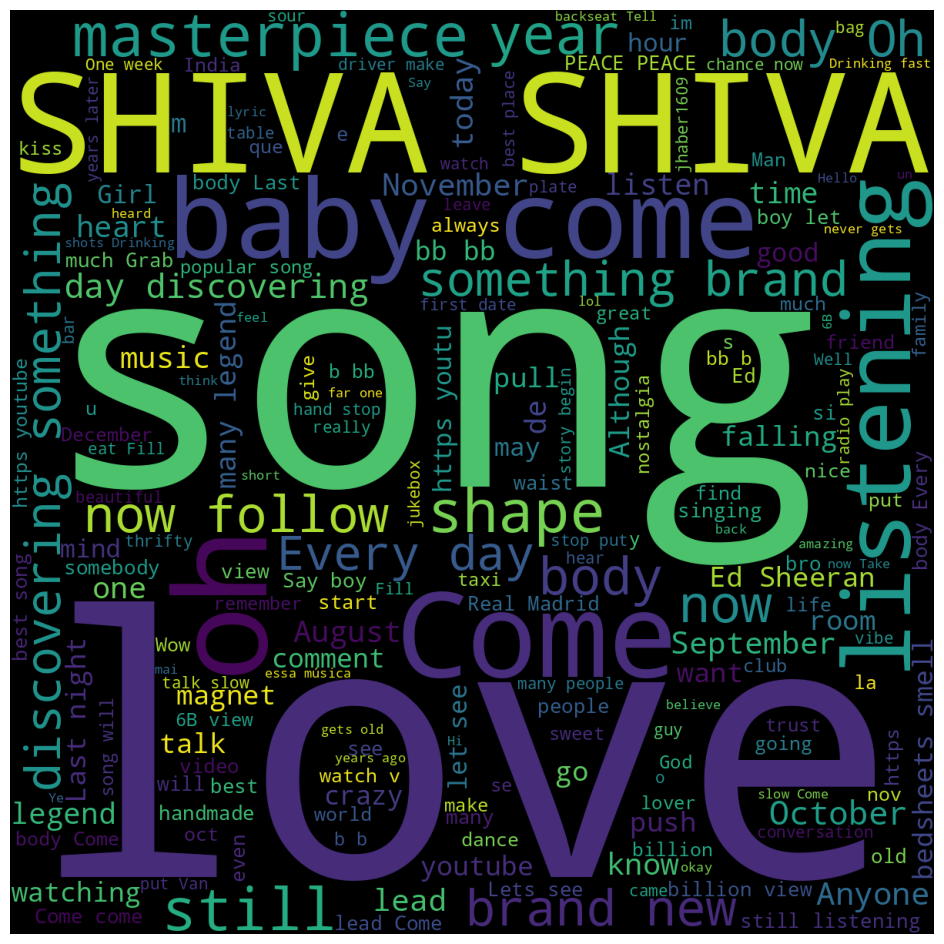

In [10]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
from wordcloud import STOPWORDS

FRACTION = 1.0
subplots(figsize=(12, 12))
text = ' '.join(df.dropna(subset='Comment').sample(frac=FRACTION, random_state=2023)['Comment'].values.tolist())
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, stopwords=STOPWORDS,).generate(text=text), )
axis('off')